# **Lab Project Part 2 - CNNs for Image Classification**
------------------------------

### General Guideline
1. **Aim**:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(PyTorch).*
2. **Prerequisite**:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*
3. **Guidelines**:
    Students should work on the assignments in a group of *three person* for two weeks. Some minor additions and changes might be done during these three weeks. Students will be informed for these changes via Canvas. Any questions regarding the assignment content can be discussed on Piazza. Students are expected to do this assignment in Python and Pytorch, however students are free to choose other tools (like Tensorflow). Your source code and report must be handed in together in a zip file (*ID1_ID2_ID3.zip*) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given script and answer all given questions (in green boxes). Briefly describe what you implemented. Blue boxes are there to give you hints to answer questions.*
    - *Analyze your results and discuss them, e.g.*, why algorithm A works better than algorithm B in a certain problem.
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*
4. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
5. **Plagiarism note**: 
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.

### PyTorch versions
we assume that you are using the latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** If you want to run the notebook locally, we recommend installing *anaconda* for configuring *python* package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***: What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
<!-- You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

##  **Introduction**

This part of the assignment makes use of Convolutional Neural Networks (CNN). The previous part makes use of hand-crafted features like SIFT to represent images, then trains a classifier on top of them. In this way, learning is a two-step procedure with image representation and learning. The method used here instead *learns* the features jointly with the classification. Training CNNs roughly consists of three parts:  (i) Creating the network architecture, (ii) Reprocessing the data, (iii) Feeding the data to the network, and updating the parameters. Please follow the instruction and finish the below tasks. (**Note:**  **Feel free to change the provided codes**.)

## **Session 1: Image Classifiation on CIFAR-100**
### 1.1 Install pytorch and run the given codes

First of all, you need to install PyTorch and relevant packages. In this session, we will use [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) as the training and testing dataset. 

In [49]:
!pip install torch-summary

In [50]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import pickle
from torch.utils.data import Dataset, DataLoader
import random
import os
from torchsummary import summary

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR100(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby','bear', 'beaver','bed','bee','beetle','bicycle','bottle', 'bowl','boy','bridge', 'bus','butterfly', 'camel','can','castle','caterpillar','cattle',
 'chair','chimpanzee','clock','cloud', 'cockroach','couch', 'cra','crocodile', 'cup','dinosaur','dolphin', 'elephant','flatfish', 'forest', 'fox','girl', 'hamster', 'house','kangaroo','keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion','lizard','lobster', 'man','maple_tree','motorcycle', 'mountain', 'mouse','mushroom','oak_tree', 'orange','orchid', 'otter', 'palm_tree','pear', 'pickup_truck','pine_tree',
'plain', 'plate', 'poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea', 'seal', 'shark','shrew', 'skunk','skyscraper', 'snail','snake','spider',
'squirrel', 'streetcar', 'sunflower','sweet_pepper', 'table','tank','telephone', 'television', 'tiger','tractor','train','trout', 'tulip', 'turtle','wardrobe', 'whale', 'willow_tree','wolf', 'woman','worm')

Files already downloaded and verified


####  **` Q1.1: test dataloader and show the images of each class  of CIFAR-100 (3-pts)`**  
You need to run and modify the given code and **show** the example images of CIFAR-100, **describe** the classes and images of CIFAR-100. (Please visualize at least one picture for the classes of labels from 0 to 4.) (3-*pts*)

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

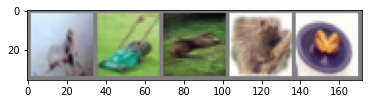

 seal lawn_mower otter porcupine  bowl


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

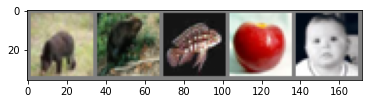

['bear', 'beaver', 'aquarium_fish', 'apple', 'baby']


In [36]:
#first 5 classes
sample_images = []
outstanding_labels = [c for c in classes[:5]]
labels_ordered = []

for step, (images, labels) in enumerate(trainloader):
    if len(outstanding_labels) == 0 or step > 100:
        break
    for image, label in zip(images, labels):
        _label = classes[label.item()]
        if _label in outstanding_labels:
            sample_images.append(image)
            outstanding_labels.remove(_label)
            labels_ordered.append(_label)

imshow(torchvision.utils.make_grid(sample_images, nrow=10))
print(labels_ordered)

### 1.2 Architecture understanding

In this section, we provide two wrapped classes of architectures defined by *nn.Module*. One is an ordinary two-layer network (*TwolayerNet*) with fully connected layers and ReLu, and the other is a Convolutional Network (*ConvNet*) utilizing the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791).

####  **`Q1.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet (4-pts).`**
1. Complement the architecture of *TwolayerNet* class, and complement the architecture of *ConvNet* class using the structure of LeNet-5. (2-*pts*)
2. Since you need to feed color images into these two networks, what's the kernel size of the first convolutional layer in *ConvNet*? and how many trainable parameters are there in "F6" layer (given the calculation process)? (2-*pts*)

In [5]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        ################################
        super(TwolayerNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.F1 = nn.Linear(input_size, hidden_size)
        self.F2 = nn.Linear(hidden_size, num_classes)
        ################################
        
    def forward(self,x):
        # the input is flatten
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        x.to(device)
        x = x.view(x.shape[0], -1)
        x = nn.functional.relu(self.F1(x))
        scores = self.F2(x)
        return scores

In [45]:
### NOTE: For simplicity, you can use nn.tanh as the activation function and output the 1x100 !! length logits directly (omit the RBF units output).
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        ################################
        super(ConvNet, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.S2 = nn.AvgPool2d(2,2)
        self.C3 = nn.Conv2d(6, 16, 5)
        self.S4 = nn.AvgPool2d(2,2)
        self.C5 = nn.Conv2d(16, 120, 5)
        self.F6 = nn.Linear(120, 84)
        self.out = nn.Linear(84, 100)
        ################################
    def forward(self, x):
        ################################
        x = torch.tanh(self.C1(x))
        x = self.S2(x)
        x = torch.tanh(self.C3(x))
        x = self.S4(x)
        x = torch.tanh(self.C5(x))
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = torch.tanh(self.F6(x))
        x = self.out(x)
        ################################
        return x

In [51]:
tln_model = TwolayerNet(3072, 128, 100)
summary(tln_model, (3, 32, 32))
cnn_model = ConvNet()
summary(cnn_model, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 393,344
├─Linear: 1-2                            [-1, 100]                 12,900
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.55
Estimated Total Size (MB): 1.56
Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Conv2d: 1-5                            [-1, 120, 1, 1]           48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 100]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Conv2d: 1-5                            [-1, 120, 1, 1]           48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 100]                 8,500
Total params: 69,656
Trainable params: 69,656
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.27
Estimated Total Size (MB): 0.33

### 1.3 Preparation of training

In above section, we use the *CIFAR-100* dataset class from *torchvision.utils* provided by PyTorch. Whereas in most cases, you need to prepare the dataset yourself. One of the ways is to create a *dataset* class yourself and then use the *DataLoader* to make it iterable. After preparing the training and testing data, you also need to define the transform function for data augmentation and optimizer for parameter updating. 

####  **` Q1.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.(8-pts)`**  
1. Complement the *CIFAR100\_loader* (2-pts)
2. Complement *Transform* function and *Optimizer* (2-pts)
3. Train the *TwolayerNet* and *ConvNet* with *CIFAR100\_loader*, *Transform* and *Optimizer* you implemented and compare the results (4-pts)

##### *` Complement  CIFAR100_loader()(2-pts)`*

In [7]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image

class CIFAR100_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        dict_data = self.unpickle(root)
        self.labels = dict_data['fine_labels']
        imgs = dict_data['data']
        self.data = self.img_format(imgs)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def img_format(self, data):
        #dim should be 32 in this case
        dim=np.sqrt(data.shape[1]/3).astype(int)
        
        r = data[:, 0:1024].reshape(data.shape[0], dim, dim, 1)
        g = data[:, 1024:2048].reshape(data.shape[0], dim, dim, 1)
        b = data[:, 2048:3072].reshape(data.shape[0], dim, dim, 1)
        return np.concatenate([r,g,b], -1)
    
    def __getitem__(self, item):
        img = self.data[item]
        label = self.labels[item]
        if self.transform is not None:
            img = self.transform(img)
            
        return img, label
    
    def unpickle(self, file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='latin')
        return dict

##### *` Complement Transform function and Optimizer (2-pts)`*

In [61]:
#initially transform train & test identical
transform_train = transform_train = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

transform_test= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [62]:
path1 = "/home/carol/Desktop/Link to Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/train"
path2 = "/home/carol/Desktop/Link to Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/test"
path3 = "/home/carol/Desktop/Link to Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/meta"

transformed_train = CIFAR100_loader(path1, transform = transform_train)
trainloader = DataLoader(transformed_train, batch_size=32, shuffle=True, num_workers=2)

transformed_test= CIFAR100_loader(path2, transform = transform_test)
testloader = DataLoader(transformed_test, batch_size=32, shuffle=True, num_workers=2)

##### *` Train the TwolayerNet and ConvNet with CIFAR100_loader, transform and optimizer you implemented and compare the results (4-pts)`*

In [63]:
#https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
def train(net, trainloader,epoch=1):
    loss_function = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=0.001)
    net.to(device)
    t_ls=[]
    
    #one epoch -> processing all data once
    for epoch in range(epoch):  
        loss_ep = 0
        net.train()
        
        #iterating through batches
        for x, l in trainloader:
            x=x.to(device)
            l=l.to(device)
            net.zero_grad()

            ## Make predictions for this batch
            tag_scores = net(x)
            
            # Compute the loss and its gradients, save the current value
            loss = loss_function(tag_scores, l)
            loss_ep+=loss
            loss.backward()
            
            # Adjust learning weights
            optimizer.step()
            #sets all gradients to 0 for future steps
            optimizer.zero_grad()
            
        print("Training data loss", loss_ep)
        t_ls.append(loss_ep)

    print('Finished Training')
    plt.title('Cross Entropy Loss {}'.format(type(net).__name__))
    plt.xlabel('Epoch')
    if torch.cuda.is_available():
        t_ls = torch.tensor(t_ls, device = 'cpu') 
    plt.plot(t_ls.
             numpy(),label="train")
    plt.legend()
    plt.show()

*train TwolayerNet*

In [ ]:
#size of image representation
tln_model = TwolayerNet(3072, 128, 100)
train(tln_model, trainloader, 30)

*train ConvNet*

In [ ]:
cnn_model = ConvNet()
train(cnn_model, trainloader, 30)

In [11]:
def valid(net,testloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            net.eval()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    string = 'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)
    val = 100 * correct / total
    return string, val

In [12]:
def valid_class(net,testloader,classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            net.eval()
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    outputs=[]
    for i in range(len(classes)):
        outputs.append('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    return outputs

In [13]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin')
    return dict

In [ ]:
classes = unpickle(path3).get('fine_label_names')

#trainee = unpickle(path1).get('data')
#print(trainee)

#print(valid(tln_model,testloader))
#valid_class(tln_model,testloader,classes)

print(valid(cnn_model,testloader))
valid_class(cnn_model,testloader,classes)

# 1.4 Setting up the hyperparameters

Some parameters must be set properly before the training of CNNs. These parameters shape the training procedure. They determine how many images are to be processed at each step, how much the weights of the network will be updated, how many iterations will the network run until convergence.  These parameters are called hyperparameters in the machine learning literature. 

####  **` Q1.4: Setting up the hyperparameters (10-pts)`**  

1. Play with ConvNet and TwolayerNet yourself, set up the hyperparameters, and reach the accuracy as high as you can.
You can modify the *train*,  *Dataloader*, *transform* and *Optimizer* function as you like. You can also modify the architectures of these two Nets. 

2. *Let's add 2 more layers in TwolayerNet and ConvNet, and show the results. (You can decide the size of these layers and where to add them.) Will you get higher performances? explain why.*
 
3.  Show the final results and described what you've done to improve the results. Describe and explain the influence of hyperparameters among *TwolayerNet* and *ConvNet*.

4. Compare and explain the differences of these two networks regarding the architecture, performances, and learning rates. 

**Hint:** You can adjust the following parameters and other parameters not listed as you like: *Learning rate, Batch size, Number of epochs, Optimizer, Transform function, Weight decay etc.* You can also change the structure a bit, for instance, adding Batch Normalization layers. Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [15]:
#Changes made on
    #Transform function
    #Random Search : Learning rate, Weight decay, Batch size, Number of epochs, Optimizer and Loss Function
#Custom function with changeable hyperparameters

In [16]:
def train2(net, trainloader,hyperparam):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    epochs, lr, wd, loss_function, current_optimizer= hyperparam
    if current_optimizer==1:
        optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    else:
        optimizer = optim.Adadelta(net.parameters(), lr=lr, weight_decay=wd)
    net.to(device)
    t_ls=[]
    
    #one epoch -> processing all data once
    for epoch in range(epoch):  
        loss_ep = 0
        net.train()
        
        #iterating through batches
        for x, l in trainloader:
            x=x.to(device)
            l=l.to(device)
            net.zero_grad()

            ## Make predictions for this batch
            tag_scores = net(x)
            
            # Compute the loss and its gradients, save the current value
            loss = loss_function(tag_scores, l)
            loss_ep+=loss
            loss.backward()
            
            # Adjust learning weights
            optimizer.step()
            #sets all gradients to 0 for future steps
            optimizer.zero_grad()
        print("Training data loss", loss_ep)
        t_ls.append(loss_ep)

    # print('Finished Training')
    # plt.title('Cross Entropy Loss {}'.format(type(net).__name__))
    # plt.xlabel('Epoch')
    # if torch.cuda.is_available():
    #     t_ls = torch.tensor(t_ls, device = 'cpu') 
    # plt.plot(t_ls.
    #          numpy(),label="train")
    # plt.legend()
    # plt.show()

In [17]:
def get_loaders(batch_sz, transform_train, transform_test):
    transformed_train = CIFAR100_loader(path1, transform = transform_train)
    trainloader = DataLoader(transformed_train, batch_size=batch_sz, shuffle=True, num_workers=2)

    transformed_test= CIFAR100_loader(path2, transform = transform_test)
    testloader = DataLoader(transformed_test, batch_size=batch_sz, shuffle=True, num_workers=2)
    return trainloader, testloader

def valid_both(net,testloader,classes):
    final = valid_class(net,testloader,classes)
    string, val = valid(net,testloader)
    final.append(string)
    return final, val

In [76]:
#modified transform: added Horizontal and Vertical flip for rubustness of model, changed with optimal CIFAR-100 values
transform_train = transform_train = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

In [66]:
param_dist = {
    'epoch':list(range(20, 80, 20)),
    'lr': [0.1, 0.01, 0.001, 0.0001],
    'wd': [0,0.01,0.3, 0.001],
    'loss_function':[nn.CrossEntropyLoss(),nn.MultiMarginLoss()],
    'batch_size':[10,32,64,128],
    'optimizers':[0, 1]
}

In [20]:
def get_random_config(parameter_distribution):
    config = []
    for key in parameter_distribution.keys():
        pos_val = parameter_distribution.get(key)
        config.append(random.choice(pos_val))
    return tuple(config)

In [58]:
def rand_search(model_type,param_dist, classes, n_iter):
    best_acc = 0
    best_config=()
    output=[]
    for i in range(n_iter):
        if model_type == 'cnn':
            model = ConvNet()
        elif model_type == 'tln':
            model = TwolayerNet(3072, 128, 100)
        elif model_type == 'cnn2':
            model = ConvNet_2()
        elif model_type == 'mln':
            model = MultiLayerNet(3072, 128, 100)
        print('Starting iteration, {}'.format(i))
        epoch, lr, wd, loss_fc, batch_sz, optim = get_random_config(param_dist)
        hyper_net = (epoch, lr, wd, loss_fc, optim)
        trainloader, testloader = get_loaders(batch_sz, transform_train, transform_test)
        train2(model, trainloader, hyper_net)
        strings, acc = valid_both(model, testloader, classes)
        if acc > best_acc:
            best_acc = acc
            best_config = (epoch, lr, wd, loss_fc, batch_sz, optim)
            output = strings
        print('Accuracy found: {}'.format(acc))
    return acc, best_config

#### *` test the accuracy of ConvNet `*

In [ ]:
print(valid(cnn_model,testloader))
valid_class(cnn_model,testloader,classes)

#### *`test the accuracy of TwolayerNet`*

In [154]:
print(valid(tln_model,testloader))
valid_class(tln_model,testloader,classes)

#### *` Add layers `*

In [67]:
class ConvNet_2(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        super(ConvNet_2, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.BN2 = nn.BatchNorm2d(6)
        self.S3 = nn.AvgPool2d(2,2)
        self.C4 = nn.Conv2d(6, 16, 5)
        self.S5 = nn.AvgPool2d(2,2)
        self.C6 = nn.Conv2d(16, 120, 5)
        self.F7 = nn.Linear(120, 84)
        self.D8 = nn.Dropout(0.4)
        self.out = nn.Linear(84, 100)
        
    def forward(self, x):
        x = self.BN2(self.C1(x))
        x = F.leaky_relu(x)
        x = self.S3(x)
        x = F.leaky_relu(self.C4(x))
        x = self.S5(x)
        x = F.leaky_relu(self.C6(x))
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.F7(x))
        x = self.D8(x)
        x = self.out(x)
        
        return x

In [80]:
class MultiLayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super(MultiLayerNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.F1 = nn.Linear(input_size, hidden_size)
        self.BN2 = nn.BatchNorm1d(hidden_size)
        self.D3 = nn.Dropout(0.4)
        self.F4 = nn.Linear(hidden_size, 64)
        self.F5 = nn.Linear(64, num_classes)
        
    def forward(self,x):
        # the input is flatten
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        x.to(device)
        x = x.view(x.shape[0], -1)
        x = self.BN2(self.F1(x))
        x = F.leaky_relu(x)
        x = self.D3(x)
        x = F.leaky_relu(self.F4(x))
        scores = self.F5(x)
        return scores

Training data loss tensor(6641.7061, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6552.7847, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6542.1406, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6534.6577, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6525.2065, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6522.9473, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6524.5854, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6517.4365, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6517.0034, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6510.2788, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6509.8125, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6513.5464, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6510.9375, device='cuda:0', grad_fn=<A

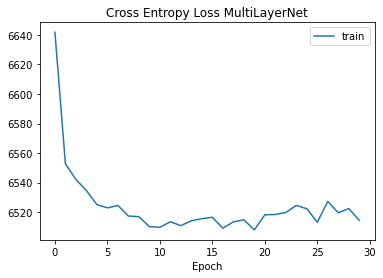

In [77]:
model_mln = MultiLayerNet(3072, 128, 100)
train(model_mln, trainloader, 30)

Training data loss tensor(6887.3818, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6739.9268, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6668.0918, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6622.5063, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6591.8550, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6553.8696, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6540.2280, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6527.5195, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6518.2949, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6508.9380, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6508.5034, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6504.7866, device='cuda:0', grad_fn=<AddBackward0>)
Training data loss tensor(6501.3018, device='cuda:0', grad_fn=<A

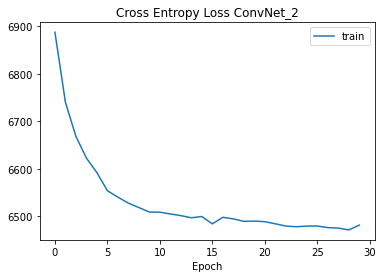

In [78]:
cnn2_model = ConvNet_2()
train(cnn2_model, trainloader, 30)

In [79]:
print(valid(model_mln,testloader))
valid_class(model_mln,testloader,classes)

print(valid(cnn2_model,testloader))
valid_class(cnn2_model,testloader,classes)

('Accuracy of the network on the 10000 test images: 7 %', 7.67)
('Accuracy of the network on the 10000 test images: 7 %', 7.11)


['Accuracy of apple : 30 %',
 'Accuracy of aquarium_fish :  0 %',
 'Accuracy of  baby :  0 %',
 'Accuracy of  bear : 15 %',
 'Accuracy of beaver :  0 %',
 'Accuracy of   bed : 13 %',
 'Accuracy of   bee : 10 %',
 'Accuracy of beetle :  0 %',
 'Accuracy of bicycle :  1 %',
 'Accuracy of bottle :  0 %',
 'Accuracy of  bowl :  1 %',
 'Accuracy of   boy : 13 %',
 'Accuracy of bridge :  0 %',
 'Accuracy of   bus :  0 %',
 'Accuracy of butterfly :  9 %',
 'Accuracy of camel :  2 %',
 'Accuracy of   can :  0 %',
 'Accuracy of castle :  7 %',
 'Accuracy of caterpillar : 35 %',
 'Accuracy of cattle :  9 %',
 'Accuracy of chair :  2 %',
 'Accuracy of chimpanzee :  0 %',
 'Accuracy of clock :  0 %',
 'Accuracy of cloud : 11 %',
 'Accuracy of cockroach : 27 %',
 'Accuracy of couch :  0 %',
 'Accuracy of  crab :  0 %',
 'Accuracy of crocodile :  0 %',
 'Accuracy of   cup :  0 %',
 'Accuracy of dinosaur :  2 %',
 'Accuracy of dolphin :  3 %',
 'Accuracy of elephant :  0 %',
 'Accuracy of flatfish : 

In [81]:
summary(cnn2_model, (3, 32, 32))
summary(model_mln, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─BatchNorm2d: 1-2                       [-1, 6, 28, 28]           12
├─AvgPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-5                         [-1, 16, 5, 5]            --
├─Conv2d: 1-6                            [-1, 120, 1, 1]           48,120
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 100]                 8,500
Total params: 69,668
Trainable params: 69,668
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.09
Params size (MB): 0.27
Estimated Total Size (MB): 0.36
Layer (type:depth-idx)                   Output Shape              Pa

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 393,344
├─BatchNorm1d: 1-2                       [-1, 128]                 256
├─Dropout: 1-3                           [-1, 128]                 --
├─Linear: 1-4                            [-1, 64]                  8,256
├─Linear: 1-5                            [-1, 100]                 6,500
Total params: 408,356
Trainable params: 408,356
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.56
Estimated Total Size (MB): 1.57

Runing Random Search on all 4 models

In [ ]:
print(rand_search('cnn',param_dist, classes, 25))

In [ ]:
print(rand_search('tln',param_dist, classes, 25))

In [ ]:
print(rand_search('mln',param_dist, classes, 25))

In [ ]:
print(rand_search('cnn2',param_dist, classes, 25))

## **Session 2:  Finetuning the ConvNet**
### 2.1 STL-10 DATASET
> The above networks are trained on CIFAR-100, which
contains the images of 100 different object categories, each of which has $32\times32 \times3$ dimensions. 
The dataset we use throughout this session is a subset of [STL-10](https://cs.stanford.edu/~acoates/stl10/)
with higher resolution and different object classes. So, there is a discrepancy between the previous dataset (CIFAR-100) and the new dataset (STL-10). One solution would be to train the whole network from scratch. However, the number of parameters is too large to be trained properly with such few images. Another way is to use the pre-trained network (on CIFAR-100) and then finetune the network on the new dataset (STL-10) (*e.g.*, use the same architectures in all layers except the output layer, as the number of output classes changes (from 100 to 5)).


In [167]:
# Use the following codes if necessary
# referenced codes: https://cs.stanford.edu/~acoates/stl10/

from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    

sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


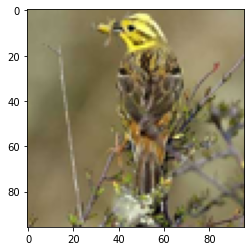

(5000, 96, 96, 3)
torch.Size([5])
Saving images to disk
./img/tensor(29)/0
./img/tensor(85)/1
./img/tensor(9)/2
./img/tensor(64)/3
./img/tensor(22)/4


IndexError: index 5 is out of bounds for dimension 0 with size 5

In [168]:
# download data if needed
download_and_extract()

# # test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# # test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

# labels = read_labels(LABEL_PATH)
print(labels.shape)

# # save images to disk
save_images(images, labels)

#### **`Q2.1 Create the STL10_Dataset (5-pts)`**
In this Session, download STL-10 and extract 5 classes from STL-10 training dataset. The the labels of images will be defined as: 

`{1: 'car',2:'deer',3:'horse',4:'monkey',5:'truck'}`

 Extract mentioned 5 classes of images from STL-10. Complement *`STL10_Dataset`* class and match each class with the label accordingly. Hint: You can use the codes above to help to complement *`STL10_Dataset`* class. (5-pts)


In [172]:
save_image(images[1],"first")

In [31]:
class STL10_Dataset(Dataset):

    def __init__(self, root, train=True, transform=None):
        
        self.root = root
        self.train = train
        self.data = []
        self.labels = []
        self.transform = transform

        if train:
            x_path =  'train_X.bin'
            y_path =  'train_y.bin'
        else:
            x_path = 'test_X.bin'
            y_path = 'test_y.bin'

        # DATA
        path_to_data = os.path.join(self.root, x_path)
        with open(path_to_data, 'rb') as f:
            input = np.fromfile(f, dtype=np.uint8)
            images = np.transpose(np.reshape(input, (-1, 3, 96, 96)), (0, 1, 3, 2))
        self.data = images

        # LABELS
        labels = None
        path_to_labels = os.path.join(self.root, y_path)
        with open(path_to_labels, 'rb') as f:
            labels = np.fromfile(f, dtype=np.uint8) - 1
        self.labels = labels

        #KEEP ONLY REQUIRED LABELS 
        self.data = self.data[self.labels < 5]
        self.labels = self.labels[self.labels < 5]

        #CHECK SHAPE
        print(self.data.shape, self.labels.shape[0])
 

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, item):

        img = self.data[item]
        target = int(self.labels[item])

        # Transform (if applicable)
        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [32]:
transform_stl = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((32, 32)), # Scale to 32x32
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                    ])

# Use our custom dataset with the dataloader
trainset_stl = STL10_Dataset(root='./data/stl10_binary', train=True, transform=transform_stl)
trainloader_stl = torch.utils.data.DataLoader(trainset_stl, batch_size=4, shuffle=True, num_workers=2)
testset_stl = STL10_Dataset(root='./data/stl10_binary', train=False, transform=transform_stl)
testloader_stl = torch.utils.data.DataLoader(testset_stl, batch_size=4, shuffle=False, num_workers=2)

(2500, 3, 96, 96) 2500
(4000, 3, 96, 96) 4000


In [ ]:
new_train = STL10_Dataset(path1, transform = transform)
trainloader_stl = DataLoader(new_train, batch_size=50, shuffle=True, num_workers=2)

### 2.2 Fine-tuning ConvNet
You should load the pre-trained parameters and modify the output layer of pre-trained ConvNet from 100 to 5. You can either load the pre-trained parameters and then modify the output layer, or change the output layer firstly and then load the matched pre-trained parameters. The examples can be found at [link1](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) and [link2](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).


#### **`Q2.2  Finetuning from ConvNet (10-pts)`**
1. Load the pre-trained parameters (pretrained on CIFAR-100) and modify the ConvNet. (5-pts)
2. Train the model and show the results (settings of hyperparameters, accuracy, learning curve). (5-pts)

**Hint**:  Once the network is trained, it is a good practice to understand the feature space by visualization techniques. There are several techniques to visualize the feature space. [**t-sne**](https://lvdmaaten.github.io/tsne/) is a dimensionality reduction method which can help you better understand the feature learning process.

In [ ]:
class ConvNet_5(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        super(ConvNet_2, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.BN2 = nn.BatchNorm2d(6)
        self.S3 = nn.AvgPool2d(2,2)
        self.C4 = nn.Conv2d(6, 16, 5)
        self.S5 = nn.AvgPool2d(2,2)
        self.C6 = nn.Conv2d(16, 120, 5)
        self.F7 = nn.Linear(120, 84)
        self.D8 = nn.Dropout(0.4)
        self.out = nn.Linear(84, 5)
        
    def forward(self, x):
        x = self.BN2(self.C1(x))
        x = F.leaky_relu(x)
        x = self.S3(x)
        x = F.leaky_relu(self.C4(x))
        x = self.S5(x)
        x = F.leaky_relu(self.C6(x))
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.F7(x))
        x = self.D8(x)
        x = self.out(x)
        
        return x

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

###  **`Bonus (optional)`**
Play with the code and try to get a higher accuracy on the test dataset (5 class from STL-10) as high as you can. The only data you can use is from CIFAR-100 and SLT-10. The higher accuracy among all teams can get extra points. Specifically, **1st:** *5-pts*, **2nd and 3rd:** *4-pts*, **4th and 5th:** *3-pts*, **6th and 7th:** *2-pts*, **8th-10th:** *1-pts*. You can adjust the hyperparameters and changing structures. Your strategies should be described and explained in your report.

*Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.*

**Hints**:
*   Data augmentation
*   Grid Search
*   Freezing early layers
*   Modifying Architecture
*   Modifying hyperparameters, *etc*.
*   [Other advice](https://cs231n.github.io/transfer-learning/)

In [ ]:
################################
# Todo: finish the code
################################